## <span style="color:#9932CC">Notebook 5</span>
### Yuritzy Pérez Corona 18/10/2023
#### Dataset: Wine Quallity Dataset
![Vino blanco](wine.jpg)

Información sobre el conjunto de datos:
El conjunto de datos se descargó del repositorio de aprendizaje automático de la UCI.
Los dos conjuntos de datos están relacionados con variantes tintas y blancas del vino portugués "Vinho Verde". La referencia [Cortez et al., 2009]. Debido a cuestiones de privacidad y logística, sólo se dispone de variables fisicoquímicas (entradas) y sensoriales (la salida) (por ejemplo, no hay datos sobre tipos de uva, marca del vino, precio de venta del vino, etc.).
Estos conjuntos de datos pueden considerarse tareas de clasificación o regresión. Las clases están ordenadas y no equilibradas (por ejemplo, hay más vinos normales que excelentes o malos). Podrían utilizarse algoritmos de detección de valores atípicos para detectar los pocos vinos excelentes o malos. Además, no estamos seguros de que todas las variables de entrada sean relevantes. Por eso sería interesante probar métodos de selección de características.
Se combinaron dos conjuntos de datos y se eliminaron aleatoriamente algunos valores.
Información sobre atributos:

Para más información, lea [Cortez et al., 2009].
Variables de entrada (basadas en pruebas fisicoquímicas):
1 - acidez fija
2 - acidez volátil
3 - ácido cítrico
4 - azúcar residual
5 - cloruros
6 - dióxido de azufre libre
7 - dióxido de azufre total
8 - densidad
9 - pH
10 - sulfatos
11 - alcohol
Variable de salida (basada en datos sensoriales):
12 - calidad (puntuación entre 0 y 10)

Agradecimientos:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos y J. Reis.
Modeling wine preferences by data mining from physicochemical properties. En Decision Support Systems, Elsevier, 47(4):547-553, 2009.


#### Obtenido de: https://www.kaggle.com/datasets/rajyellow46/wine-quality
#### Importar librerías principales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####  Cargamos los datos

In [2]:
df = pd.read_csv("winequalityN.csv", delimiter=',')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### Cambiaremos los nombres de las variables a español

In [4]:
# Diccionario de mapeo de nombres de variables de inglés a español
mapeo_nombres = {
    "fixed acidity": "acidez fija",
    "volatile acidity": "acidez volátil",
    "citric acid": "ácido cítrico",
    "residual sugar": "azúcar residual",
    "chlorides": "cloruros",
    "free sulfur dioxide": "dióxido de azufre libre",
    "total sulfur dioxide": "dióxido de azufre total",
    "density": "densidad",
    "pH": "pH",
    "sulphates": "sulfatos",
    "alcohol": "alcohol",
    "quality": "calidad"
}

# Cambiar los nombres de las variables en el DataFrame
df.rename(columns=mapeo_nombres, inplace=True)

# Imprimir el DataFrame con los nombres en español
print(df)

       type  acidez fija  acidez volátil  ácido cítrico  azúcar residual  \
0     white          7.0           0.270           0.36             20.7   
1     white          6.3           0.300           0.34              1.6   
2     white          8.1           0.280           0.40              6.9   
3     white          7.2           0.230           0.32              8.5   
4     white          7.2           0.230           0.32              8.5   
...     ...          ...             ...            ...              ...   
6492    red          6.2           0.600           0.08              2.0   
6493    red          5.9           0.550           0.10              2.2   
6494    red          6.3           0.510           0.13              2.3   
6495    red          5.9           0.645           0.12              2.0   
6496    red          6.0           0.310           0.47              3.6   

      cloruros  dióxido de azufre libre  dióxido de azufre total  densidad  \
0        

### <span style="color:#8B008B">Análisis exploratorio de los datos</span>
#### Buscamos datos faltantes y  como existen en varias variables, los eliminamos.

In [5]:
print("Valores faltantes por columna:/n", df.isnull().sum())
df.dropna(inplace=True)
df

Valores faltantes por columna:/n type                        0
acidez fija                10
acidez volátil              8
ácido cítrico               3
azúcar residual             2
cloruros                    2
dióxido de azufre libre     0
dióxido de azufre total     0
densidad                    0
pH                          9
sulfatos                    4
alcohol                     0
calidad                     0
dtype: int64


,type,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre libre,dióxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Una vez eliminados los valores NaN, observamos la estadística de los datos.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acidez fija,6463.0,7.217755,1.297913,3.80000,6.40000,7.00000,7.700,15.90000
acidez volátil,6463.0,0.339589,0.164639,0.08000,0.23000,0.29000,0.400,1.58000
ácido cítrico,6463.0,0.318758,0.145252,0.00000,0.25000,0.31000,0.390,1.66000
azúcar residual,6463.0,5.443958,4.756852,0.60000,1.80000,3.00000,8.100,65.80000
cloruros,6463.0,0.056056,0.035076,0.00900,0.03800,0.04700,0.065,0.61100
dióxido de azufre libre,6463.0,30.516865,17.758815,1.00000,17.00000,29.00000,41.000,289.00000
dióxido de azufre total,6463.0,115.694492,56.526736,6.00000,77.00000,118.00000,156.000,440.00000
densidad,6463.0,0.994698,0.003001,0.98711,0.99233,0.99489,0.997,1.03898
pH,6463.0,3.218332,0.160650,2.72000,3.11000,3.21000,3.320,4.01000
sulfatos,6463.0,0.531150,0.148913,0.22000,0.43000,0.51000,0.600,2.00000


#### Observamos los histogramas con su tendencia de cada una de las variables 

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

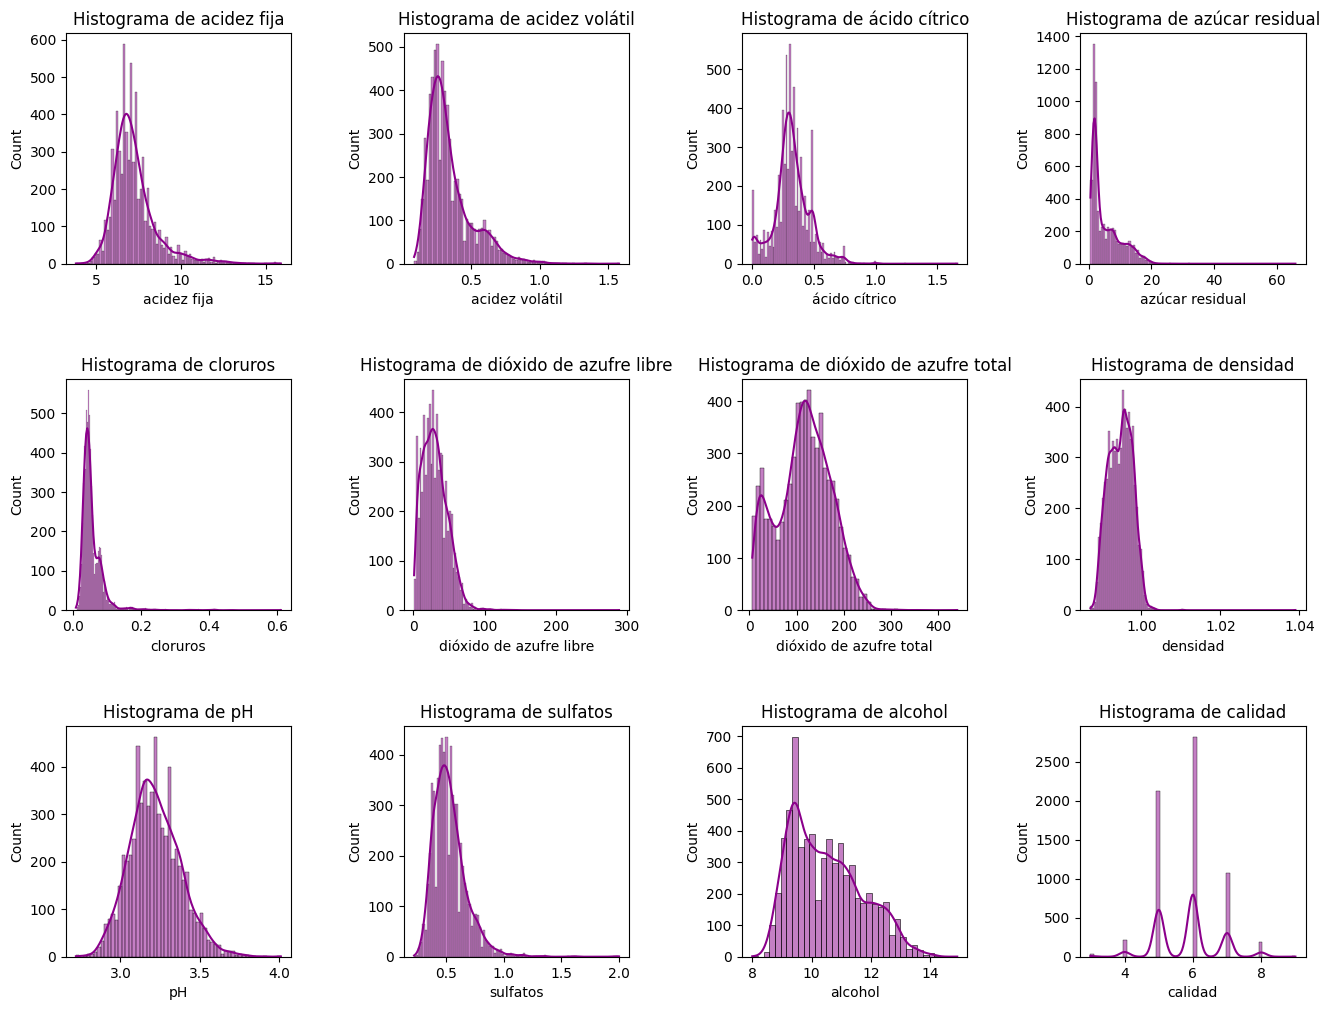

In [8]:
# Lista de variables independientes
independent_variables = df.columns[1:]

# Subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, var in enumerate(independent_variables):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # Crea histograma con linea de tendencia
    sns.histplot(df[var], kde=True, ax=ax, color='#8B008B')
    ax.set_title(f'Histograma de {var}')

plt.show()

#### En general los graficos de las variables muestran una distribución normal con outliers generalmente hacia valores mayores. En el caso de la calidad encontramos que la mayoría de los vinos muestran una calidad de 6. La variable calidad será nuestra variable objetivo.
#### Observaremos los graficos de violín respecto a la variable tipo de vino.

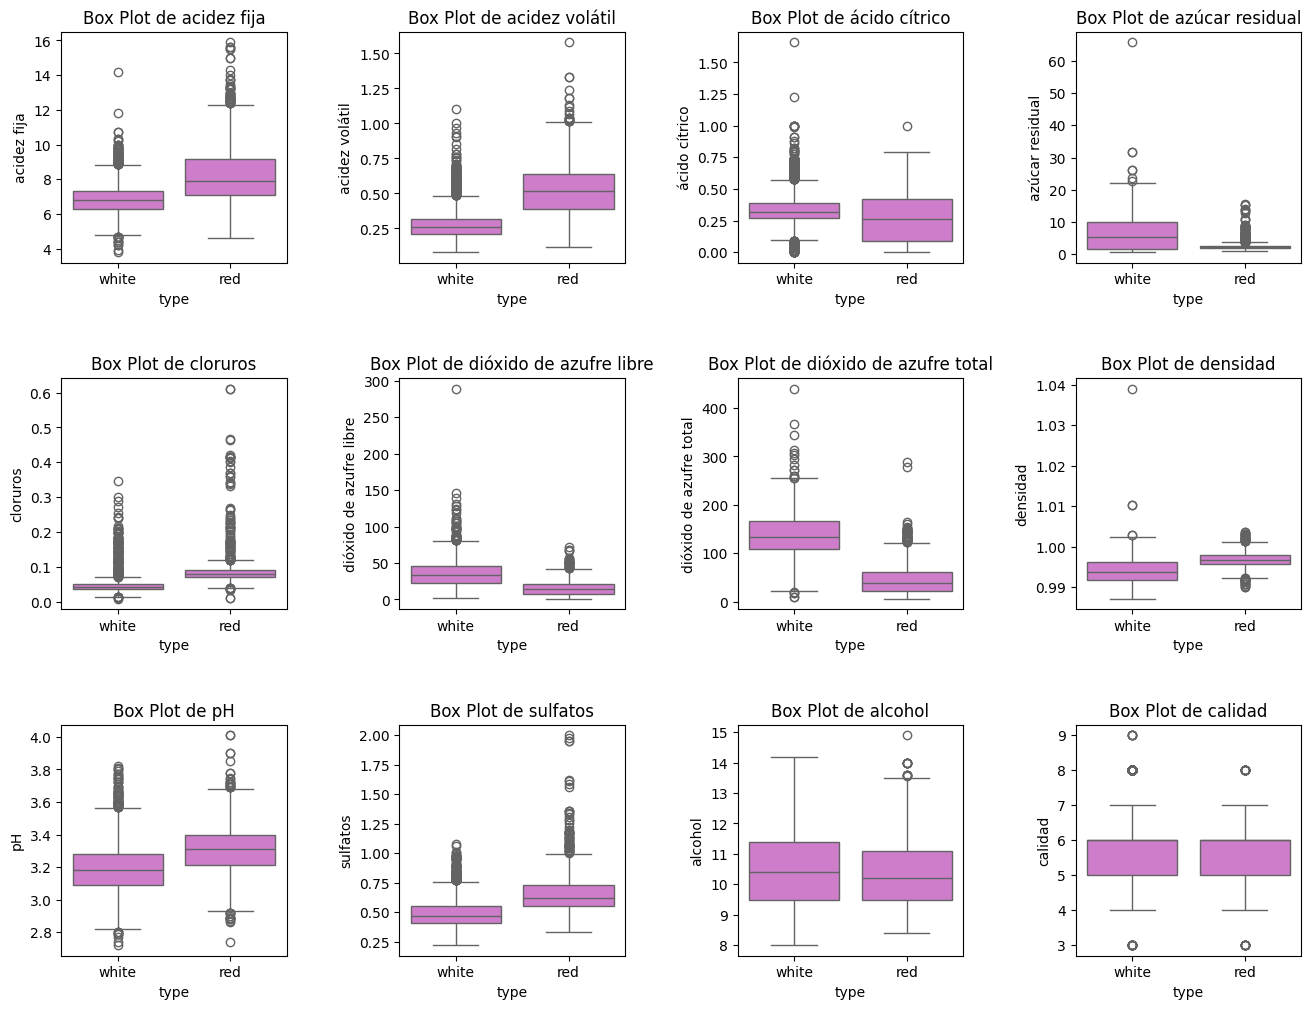

In [9]:
# Subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, var in enumerate(independent_variables):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # Histograma con línea de tendencia
    sns.boxplot(x='type', y=var, data=df, ax=ax, color='#DA70D6')
    ax.set_title(f'Box Plot de {var}')

plt.show()

#### Se puede observar que respecto al tipo de vino, el blanco y el tinto comparten características como la cantidad de alcohol y La calidad que está centrada en ambos tipos de vino en 5 y 6. El vino tinto tiene mayor pH, más sulfatos, más densidad, más acidez fija y volatil. Mientras que características como dióxido de azufre libre, dióxido de azufre total y azúcar residual son mayores en el vino blanco.
#### Ahora observamos las variables respecto a la calidad, que es nuestra variable objetivo.

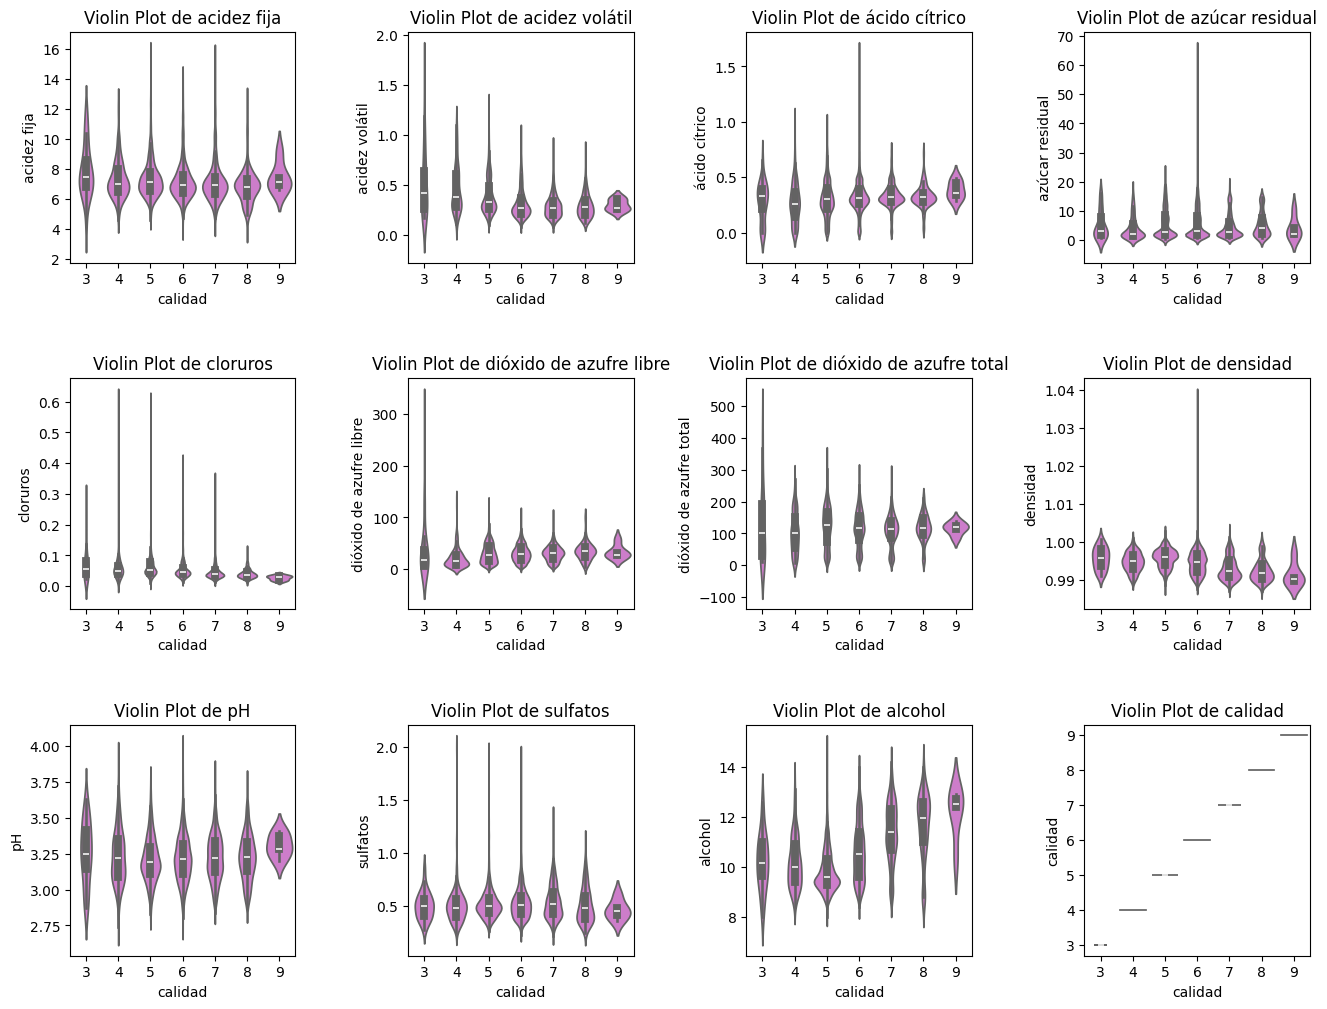

In [10]:
# Subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, var in enumerate(independent_variables):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # Histograma con línea de tendencia
    sns.violinplot(x='calidad', y=var, data=df, ax=ax, color='#DA70D6')
    ax.set_title(f'Violin Plot de {var}')

plt.show()

#### Se observa que los vinos de mejor calidad tienen concentraciones de ácido cítrico centradas en 0.4, sin valores muy elevados. sucede lo mismo con los cloruros donde se mantienen en valores menores a 0.1. Respecto al dioxido de azufre los vinos de menor calidad tienen concentraciones muy variadas de dióxico de azufre. El alcohol tiene mayor presencia en los vinos de mayor calidad.

#### Como ya definimos a nuestra variable objetivo la vamos a meter en nuestra variable y y las demás en la X.

In [11]:
X = df.drop(columns=['calidad'])
X_num = df.drop(columns=['calidad']) #Variables numéricas
y= df['calidad']
y_cat= df['calidad'] #Variable que convertiremos a categórica

#### Como último paso antes de pasar a los objetivos, convertirémos nuestra variable categorica tipo de vino a numérica con sklearn.

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Transformar la columna "type" en valores numéricos sin modificar el DataFrame original
X_num["type"] = encoder.fit_transform(X_num["type"])

# Imprimir el DataFrame original
print(X_num)

      type  acidez fija  acidez volátil  ácido cítrico  azúcar residual  \
0        1          7.0           0.270           0.36             20.7   
1        1          6.3           0.300           0.34              1.6   
2        1          8.1           0.280           0.40              6.9   
3        1          7.2           0.230           0.32              8.5   
4        1          7.2           0.230           0.32              8.5   
...    ...          ...             ...            ...              ...   
6491     0          6.8           0.620           0.08              1.9   
6492     0          6.2           0.600           0.08              2.0   
6494     0          6.3           0.510           0.13              2.3   
6495     0          5.9           0.645           0.12              2.0   
6496     0          6.0           0.310           0.47              3.6   

      cloruros  dióxido de azufre libre  dióxido de azufre total  densidad  \
0        0.045       

#### Utilizaremos la variable X_num para los siguientes procedimientos que solo se pueden realizar con variables numéricas.
#### Nuestra y, también la podemos representar como una variable categoríca para lo que utilizaremos y_cat. Que estará definida de acuerdo a sus valores numéricos. 
#### Observamos primero los valores de dicha variable.

In [13]:
y_cat.value_counts()

calidad
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: count, dtype: int64

#### Dividiremos la a la calidad en dos categorías Mal Vino y Vino Bueno

In [14]:
# Definir los límites de las categorías y las etiquetas
cortes = [2, 5, 9]  # Definir los límites de las categorías
etiquetas = ["Mal Vino", "Vino Bueno"]  # Etiquetas para las categorías

# Convertir la variable numérica a una variable categórica
y_cat = pd.cut(y_cat, bins=cortes, labels=etiquetas)

# Imprimir el DataFrame con la variable categórica
print(y_cat)

0       Vino Bueno
1       Vino Bueno
2       Vino Bueno
3       Vino Bueno
4       Vino Bueno
           ...    
6491    Vino Bueno
6492      Mal Vino
6494    Vino Bueno
6495      Mal Vino
6496    Vino Bueno
Name: calidad, Length: 6463, dtype: category
Categories (2, object): ['Mal Vino' < 'Vino Bueno']


#### Los pasaremos ahora de datos categoricos a numéricos

In [15]:
label_quality = LabelEncoder()
y_num = label_quality.fit_transform(y_cat)

#### Contaremos el número de valores en la calidad con el encoding

In [16]:
np.bincount(y_num)

array([2372, 4091], dtype=int64)

#### Dividimos nuestros datos

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_num, y_cat, test_size=0.2, random_state=42)

### <span style="color:#8B008B">Preprocesamiento</span>

#### Este procesamiento preprocesamiento de datos lo utilizaremos en comparación a los datos que ya tenemos para ver la comparación en los resultados del modelo.

#### Eliminaremos ahora los valores atípicos

In [18]:
from sklearn.ensemble import IsolationForest

# Create the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)

# Ajuste del modelo y predicción de valores atípicos
outlier_predictions = clf.fit_predict(X_train)

# Remover valores atípicos
clean_X = X_train[outlier_predictions != -1]
clean_y = y_train[outlier_predictions != -1]

#### Haremos un balanceo de las clases debido a que como vimos, se encuentra nuestro modelo con más números de un conjunto de datos que de otro

<Axes: ylabel='Calidad'>

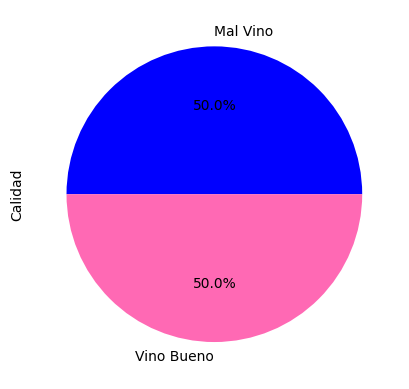

In [19]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(clean_X, clean_y)
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)
colors=['blue', '#FF69B4']
data_resampled.groupby(data_resampled.iloc[:, -1]).size().plot(kind='pie', y="Calidad", label="Calidad", autopct='%1.1f%%', colors=colors)

#### Preprocesamiento de datos ya balanceados

In [20]:
data_resampled = data_resampled.to_numpy()

# Arreglos de numpy para su futuro procesamiento
X_trainr = data_resampled[:, :-1]
y_trainr = data_resampled[:, -1]

# Creamos un pipeline para los datos preprocesados
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
my_pipeline=Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

# Aplicamos a nuestos datos
X_trainr = my_pipeline.fit_transform(X_trainr)
X_testr = my_pipeline.fit_transform(X_test)

#### Las variables ya procesadas y balanceadas están guardadas en los conjuntos X_trainr, X_testr y y_trainr

### <span style="color:#8B008B">Reducción de dimensionalidad</span>
#### Utilizaremos PCA para obtener las componentes principales de nuestros datos.
#### Importamos las librerías para PCA

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

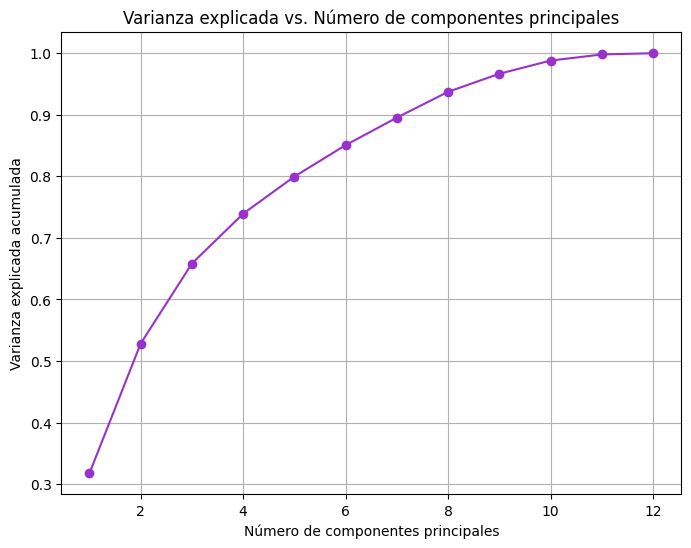

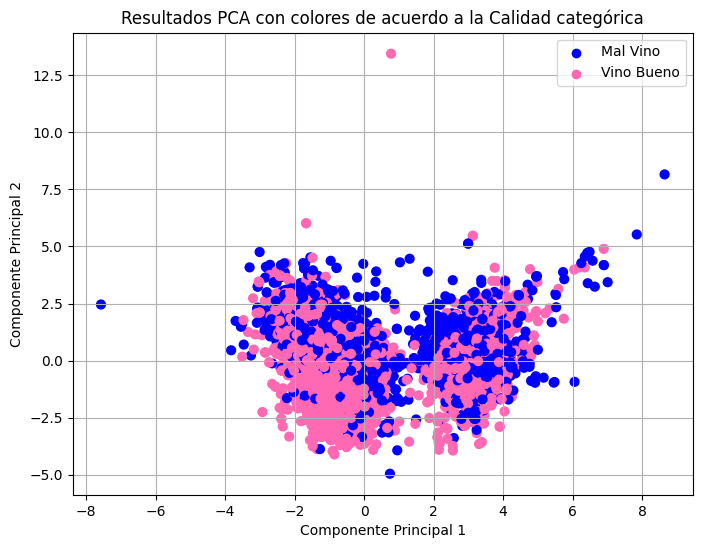

In [22]:

# Estandarizamos los datos (importante para PCA)
scaler = StandardScaler()
X_std = scaler.fit_transform(X_num)

# Aplicamos PCA
n_components = min(X_std.shape[0], X_std.shape[1])  # Elegimos el numero de componentes 
pca = PCA(n_components=n_components)
pca.fit(X_std)

# Varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

# Plot de la varianza explicada
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='-', color='#9932CC')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada vs. Número de componentes principales')
plt.grid()
plt.show()

# Seleccionamos el número de componentes deseadas basados en la varianza expplicada
desired_n_components = 5  

# Alica PCA con el numero de componentes deseadas
pca = PCA(n_components=desired_n_components)
X_pca = pca.fit_transform(X_std)

# Ahora X_pca contiene los datos transformados con dimensionalidad reducida

# Creamos un Dattaframe con los datos reducidos
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(desired_n_components)])

# Plot los datos reducidos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=y_cat.map({'Mal Vino': 'blue', 'Vino Bueno': '#FF69B4'}), s=40)

# Agregar una leyenda
legend_labels = ['Mal Vino', 'Vino Bueno']
scatter = scatter

for category, color in zip(legend_labels, ['blue', '#FF69B4']):
    plt.scatter([], [], c=color, label=category)

plt.legend()
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados PCA con colores de acuerdo a la Calidad categórica')
plt.grid()
plt.show()

#### Guardaremos los resultados de la reducción de dimensionalidad para estudiar más adelante con los modelos de clasificación.

### <span style="color:#8B008B">Modelos de clasificación con datos sin procesar</span>
#### Construir y evaluar n modelos de clasificación y comparar sus resultados con las siguientes métricas: (i) accuracy, (ii) sensibilidad, y (iii) especificidad; además de mostrar las respectivas matrices de confusión. La partición de los datos para la evaluación de los modelos se deberá realizar con validación cruzada (k=10) con la herramienta Scikit-learn. En este paso, se analizaron los modelos primero de una en uno y los 5 restantes fueron evalluados de manera conjunta por simplicidad. 
#### El conjunto de datos utilizado es el que no tiene el balanceo, ocupa las variables numéricas en X y la variable categórica y.
#### Importamos librerías generales para la clasificación

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
import warnings
from sklearn.exceptions import ConvergenceWarning

#### Agregamos los modelos que utilizaremos

In [24]:
# Definir los clasificadores en un diccionario
classifiers = {
    "C4.5 (Decision Tree)": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(),
    "SVM (linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Multilayer Perceptron": MLPClassifier()
}


#### Utilizaremos un loop para poder hacer todos al mismo tiempo y obtener los resultados en conjunto

In [25]:
import warnings
from sklearn.exceptions import ConvergenceWarning
results = {}
# Ciclo for para evaluar cada clasificador
for classifier_name, classifier in classifiers.items():
    # Entrenar el clasificador
    classifier.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    #y_pred = classifier.predict(X_testr)
    y_pred = cross_val_predict(classifier, X_test, y_test, cv=10)
    
    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    sensibilidad = recall_score(y_test, y_pred, pos_label='Vino Bueno')
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    especificidad = TN / (TN + FP)
    f1 = f1_score(y_test, y_pred, pos_label='Vino Bueno')
    # Imprimir resultados
    print(f"Classifier: {classifier_name}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Accuracy: {accuracy}")
    print(f"Sensibility (Recall): {sensibilidad}")
    print(f"Especificity: {especificidad}")
    print(f"F1 Score: {f1}")
    print("\n")

Classifier: C4.5 (Decision Tree)
Confusion Matrix:
[[307 175]
 [196 615]]
Accuracy: 0.7130703789636504
Sensibility (Recall): 0.7583230579531443
Especificity: 0.6369294605809128
F1 Score: 0.7682698313554029


Classifier: Naive Bayes
Confusion Matrix:
[[291 191]
 [211 600]]
Accuracy: 0.6890951276102089
Sensibility (Recall): 0.7398273736128237
Especificity: 0.6037344398340249
F1 Score: 0.7490636704119851


Classifier: k-NN
Confusion Matrix:
[[200 282]
 [211 600]]
Accuracy: 0.6187161639597835
Sensibility (Recall): 0.7398273736128237
Especificity: 0.4149377593360996
F1 Score: 0.7088009450679267


Classifier: SVM (linear)
Confusion Matrix:
[[289 193]
 [141 670]]
Accuracy: 0.7416860015467904
Sensibility (Recall): 0.8261405672009864
Especificity: 0.5995850622406639
F1 Score: 0.8004778972520907


Classifier: SVM (RBF)
Confusion Matrix:
[[ 18 464]
 [ 15 796]]
Accuracy: 0.6295436968290796
Sensibility (Recall): 0.9815043156596794
Especificity: 0.03734439834024896
F1 Score: 0.7687107677450506


Cla

### <span style="color:#9932CC">Ahora los resultados con los datos preprocesados y balanceados las que marcamos con r</span>

In [26]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignorar advertencias específicas
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Ciclo for para evaluar cada clasificador
for classifier_name, classifier in classifiers.items():
    # Entrenar el clasificador
    classifier.fit(X_trainr, y_trainr)
    
    # Realizar predicciones en el conjunto de prueba
    #y_pred = classifier.predict(X_testr)
    y_pred = cross_val_predict(classifier, X_testr, y_test, cv=10)
    
    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    sensibilidad = recall_score(y_test, y_pred, pos_label='Vino Bueno')
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    especificidad = TN / (TN + FP)
    f1 = f1_score(y_test, y_pred, pos_label='Vino Bueno')
    
    # Imprimir resultados
    print(f"Classifier: {classifier_name}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Accuracy: {accuracy}")
    print(f"Sensibility (Recall): {sensibilidad}")
    print(f"Especificity: {especificidad}")
    print(f"F1 Score: {f1}")
    print("\n")

Classifier: C4.5 (Decision Tree)
Confusion Matrix:
[[305 177]
 [200 611]]
Accuracy: 0.708430007733952
Sensibility (Recall): 0.7533908754623921
Especificity: 0.6327800829875518
F1 Score: 0.7642276422764227


Classifier: Naive Bayes
Confusion Matrix:
[[300 182]
 [220 591]]
Accuracy: 0.6890951276102089
Sensibility (Recall): 0.7287299630086314
Especificity: 0.6224066390041494
F1 Score: 0.7462121212121211


Classifier: k-NN
Confusion Matrix:
[[275 207]
 [144 667]]
Accuracy: 0.728538283062645
Sensibility (Recall): 0.8224414303329223
Especificity: 0.5705394190871369
F1 Score: 0.7916913946587537


Classifier: SVM (linear)
Confusion Matrix:
[[284 198]
 [140 671]]
Accuracy: 0.7385924207269915
Sensibility (Recall): 0.8273736128236745
Especificity: 0.5892116182572614
F1 Score: 0.7988095238095237


Classifier: SVM (RBF)
Confusion Matrix:
[[297 185]
 [130 681]]
Accuracy: 0.7563805104408353
Sensibility (Recall): 0.8397040690505548
Especificity: 0.6161825726141079
F1 Score: 0.8121645796064401


Classi

#### Resumen de resultados de la primera parte que corresponde a la práctica 1
#### Datos sin procesar
| Classifier              | Confusion Matrix    | Accuracy | Sensibility (Recall) | Specificity        | F1 Score |
|-------------------------|---------------------|----------|-----------------------|--------------------|----------|
| C4.5 (Decision Tree)   | [[304 178] [190 621]] | 0.7154   | 0.7657              | 0.6307             | 0.7714   |
| Naive Bayes            | [[291 191] [211 600]] | 0.6891   | 0.7398              | 0.6037             | 0.7491   |
| k-NN                  | [[200 282] [211 600]] | 0.6187   | 0.7398              | 0.4149             | 0.7088   |
| SVM (linear)          | [[289 193] [141 670]] | 0.7417   | 0.8261              | 0.5996             | 0.8005   |
| SVM (RBF)             | [[ 18 464] [ 15 796]] | 0.6295   | 0.9815              | 0.0373             | 0.7687   |
| Random Forest         | [[315 167] [123 688]] | 0.7757   | 0.8483              | 0.6535             | 0.8259   |
| Gradient Boosting     | [[308 174] [137 674]] | 0.7595   | 0.8311              | 0.6390             | 0.8125   |
| AdaBoost              | [[298 184] [165 646]] | 0.7301   | 0.7965              | 0.6183             | 0.7873   |
| Multilayer Perceptron | [[257 225] [154 657]] | 0.7069   | 0.8101              | 0.5332             | 0        | 0.8137   |
 0.6328            |
.        |


#### Datos preprocesados
| Classifier              | Confusion Matrix    | Accuracy | Sensibility (Recall) | Specificity        | F1 Score |
|-------------------------|---------------------|----------|-----------------------|--------------------|----------|
| C4.5 (Decision Tree)   | [[303 179] [196 615]] | 0.7099   | 0.7583              | 0.6286             | 0.7664   |
| Naive Bayes            | [[300 182] [220 591]] | 0.6891   | 0.7287              | 0.6224             | 0.7462   |
| k-NN                  | [[275 207] [144 667]] | 0.7285   | 0.8224              | 0.5705             | 0.7917   |
| SVM (linear)          | [[284 198] [140 671]] | 0.7386   | 0.8274              | 0.5892             | 0.7988   |
| SVM (RBF)             | [[297 185] [130 681]] | 0.7564   | 0.8397              | 0.6162             | 0.8122   |
| Random Forest         | [[317 165] [117 694]] | 0.7819   | 0.8557              | 0.6577             | 0.8311   |
| Gradient Boosting     | [[309 173] [137 674]] | 0.7602   | 0.8311              | 0.6411             | 0.8130   |
| AdaBoost              | [[298 184] [165 646]] | 0.7301   | 0.7965              | 0.6183             | 0.7873   |
| Multilayer Perceptron | [[306 176] [134 677]] | 0.7602   | 0.8348              | 0.6349             | 0.8137   |



**Datos sin procesar:**
- **C4.5 (Decision Tree):** Este clasificador tiene un Accuracy del 71.54%, una Sensibilidad (Recall) del 76.57%, y un F1 Score del 77.14%. Esto sugiere que es razonablemente efectivo para identificar vinos de buena o mala calidad, pero podría mejorar en la Especificidad (62.86%).
- **Naive Bayes:** Muestra un Accuracy del 68.91%, una Sensibilidad (Recall) del 73.98%, y un F1 Score del 74.91%. Al igual que C4.5, podría mejorar su Especificidad (60.37%).
- **k-NN:** Logra un Accuracy del 61.87%, una Sensibilidad (Recall) del 73.98%, y un F1 Score del 70.88%. Su Especificidad es bastante baja en 41.49%, lo que indica que puede tener dificultades para identificar vinos de buena calidad.
- **SVM (linear):** Tiene un Accuracy del 74.17%, una Sensibilidad (Recall) del 82.61%, y un F1 Score del 80.05%. Muestra una mejor capacidad para identificar vinos de buena calidad y tiene una buena Especificidad del 59.96%.
- **SVM (RBF):** Muestra un Accuracy del 62.95%, una Sensibilidad (Recall) excepcionalmente alta de 98.15%, y un F1 Score del 76.87%. Sin embargo, su baja Especificidad del 3.73% sugiere que es excelente para detectar vinos de mala calidad pero tiene problemas para identificar vinos de buena calidad.
- **Random Forest:** Logra un Accuracy del 77.57%, una Sensibilidad (Recall) del 84.83%, y un F1 Score del 82.59%. Es un fuerte candidato para identificar tanto vinos de buena como mala calidad, con una Especificidad del 65.35%.
- **Gradient Boosting:** Alcanza un Accuracy del 75.95%, una Sensibilidad (Recall) del 83.11%, y un F1 Score del 81.25%. También es eficaz para identificar vinos de buena y mala calidad, con una Especificidad del 63.90%.
- **AdaBoost:** Muestra un Accuracy del 73.01%, una Sensibilidad (Recall) del 79.65%, y un F1 Score del 78.73%. Tiene un equilibrio aceptable entre la identificación de vinos de buena y mala calidad, con una Especificidad del 61.83%.
- **Multilayer Perceptron:** Obtiene un Accuracy del 70.69%, una Sensibilidad (Recall) del 81.01%, y un F1 Score del 77.61%. Aunque tiene una buena Sensibilidad, su Especificidad es la más baja en 53.32%.

**Datos preprocesados:**
- **C4.5 (Decision Tree):** Muestra un Accuracy del 70.99%, una Sensibilidad (Recall) del 75.83%, y un F1 Score del 76.64%. Al igual que en los datos sin procesar, es razonablemente efectivo pero podría mejorar su Especificidad (62.86%).
- **Naive Bayes:** Tiene un Accuracy del 68.91%, una Sensibilidad (Recall) del 72.87%, y un F1 Score del 74.62%. Al igual que C4.5, podría mejorar su Especificidad (62.24%).
- **k-NN:** Logra un Accuracy del 72.85%, una Sensibilidad (Recall) del 82.24%, y un F1 Score del 79.17%. Muestra una mejora significativa en la identificación de vinos de mala calidad y un aumento en su Especificidad (57.05%).
- **SVM (linear):** Tiene un Accuracy del 73.86%, una Sensibilidad (Recall) del 82.74%, y un F1 Score del 79.88%. Muestra un rendimiento similar al de los datos sin procesar y una buena Especificidad del 58.92%.
- **SVM (RBF):** Muestra un Accuracy del 75.64%, una Sensibilidad (Recall) del 83.97%, y un F1 Score del 81.22%. Ha mejorado en Especificidad (61.62%) en comparación con los datos sin procesar.
- **Random Forest:** Logra un Accuracy del 78.19%, una Sensibilidad (Recall) del 85.57%, y un F1 Score del 83.11%. Al igual que en los datos sin procesar, es eficaz en la identificación de vinos de buena y mala calidad, con una Especificidad del 65.77%.
- **Gradient Boosting:** Alcanza un Accuracy del 76.02%, una Sensibilidad (Recall) del 83.11%, y un F1 Score del 81.30%. Mantiene un rendimiento similar a los datos sin procesar, con una Especificidad del 64.11%.
- **AdaBoost:** Muestra un Accuracy del 73.01%, una Sensibilidad (Recall) del 79.65%, y un F1 Score del 78.73%. Su rendimiento es constante en comparación con los datos sin procesar, con una Especificidad del 61.83%.
- **Multilayer Perceptron:** Obtiene un Accuracy del 76.02%, una Sensibilidad (Recall) del 83.48%, y un F1 Score del 81.37%. Ha mejorado en Sensibilidad y Especificidad (63.49%) en comparación con los datos sin procesar.

En general, después del preprocesamiento de datos, varios clasificadores muestran mejoras en la identificación de vinos de buena calidad. Algunos modelos, como Random Forest, Gradient Boosting y Multilayer Perceptron, mantienen un buen equilibrio entre Sensibilidad y Especificidad, lo que los convierel problema en cuestión. calidad

### <span style="color:#9932CC">Ahora con PCA</span>
#### Comparar el rendimiento de los modelos utilizando los datos en su dominio original, respecto al utilizar los datos en un espacio modificado (PCA). La elección de Random Forest se basó en las siguientes consideraciones, según las conclusiones que obtuvimos al comparar los resultados entre los dos escenarios:

1. **Rendimiento General:** En ambos escenarios, tanto con datos sin preprocesamiento como con datos en los que se eliminaron outliers y se balancearon, Random Forest mostró un rendimiento general sólido con valores de Accuracy en el rango de aproximadamente 0.739 a 0.789 en el segundo escenario. Esto sugiere que el modelo es capaz de aprender de manera efectiva y proporcionar predicciones precisas.

2. **Sensibilidad:** En el segundo escenario, con datos preprocesados, Random Forest destacó por su alta sensibilidad. La sensibilidad se refiere a la capacidad del modelo para identificar verdaderos positivos, es decir, vinos de mala calidad. Esta es una métrica crítica en un problema de clasificación de vinos, ya que identificar vinos de mala calidad es de gran importancia.

3. **Equilibrio en la Identificación:** Random Forest mostró un equilibrio en la identificación de vinos de mala y buena calidad en ambos escenarios. Esto es crucial, ya que es importante tanto identificar vinos de mala calidad como no etiquetar erróneamente vinos de buena calidad como vinos de mala calidad. Random Forest logró este equilibrio de manera efectiva.

4. **Robustez a Datos Desafiantes:** Random Forest es conocido por su robustez frente a datos desafiantes, como valores atípicos y desequilibrio en las clases. Esto lo hace adecuado para situaciones en las que los datos no se procesan previamente.

Basándonos en estas consideraciones, elegir Random Forest como el modelo de clasificación para la comparación fue una decisión sólida. Proporciona un buen equilibrio entre precisión, sensibilidad y capacidad para manejar datos complejos. Además, su rendimiento en el escenario en el que los datos se preprocesaron fue particularmente destacado, lo que lo convierte en una opción confiable para la clasificación de vinos de calidad.

#### Dividimos en partes de entrenamiento y prueba las salidas de PCA

In [27]:
X_trainpca, X_testpca, y_train, y_test = train_test_split(X_pca_df, y_cat, test_size=0.2, random_state=42)

In [28]:
# Crear un clasificador Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  

# Entrenar el modelo Random Forest
random_forest.fit(X_trainpca, y_train)

# Realizar predicciones en el conjunto de prueba
#y_pred_rf = random_forest.predict(X_testpca)
y_pred_rf= cross_val_predict(random_forest, X_testpca, y_test, cv=10)

# Calcular y mostrar la matriz de confusión
confusion_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de confusión:")
print(confusion_rf)

# Calcular y mostrar la precisión
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Precisión:", accuracy_rf)

# Calcular y mostrar la sensibilidad (recall)
sensibilidad_rf = recall_score(y_test, y_pred_rf, pos_label='Vino Bueno')
print("Sensibilidad (Recall):", sensibilidad_rf)
f1_rf = f1_score(y_test, y_pred, pos_label='Vino Bueno')

# Calcular la especificidad
TN_rf = confusion_rf[0, 0]  # Verdaderos negativos para "Vino Bueno"
FP_rf = confusion_rf[0, 1]  # Falsos positivos para "Vino Bueno"
especificidad_rf = TN_rf / (TN_rf + FP_rf)
print("Especificidad:", especificidad_rf)
print("F1 Score:", f1_rf) 

Matriz de confusión:
[[296 186]
 [146 665]]
Precisión: 0.7432327919566899
Sensibilidad (Recall): 0.8199753390875463
Especificidad: 0.6141078838174274
F1 Score: 0.8154869933454326



- **Matriz de confusión:** La matriz de confusión muestra una cantidad razonable de verdaderos positivos (296) y verdaderos negativos (665), pero también se observa un número considerable de falsos positivos (186) y falsos negativos (146).

- **Precisión:** La precisión es del 74.32%, lo que indica la proporción de predicciones correctas entre todas las predicciones realizadas. Aunque es un valor razonable, la cantidad de falsos positivos y falsos negativos podría ser problemática en ciertos contextos.

- **Sensibilidad (Recall):** La sensibilidad o recall es del 81.99%, lo que sugiere que el modelo es efectivo para identificar vinos de buena calidad. Sin embargo, es importante tener en cuenta que hay falsos negativos, lo que significa que el modelo a veces no identifica vinos de buena calidad.

- **Especificidad:** La especificidad es del 61.41%, lo que indica que el modelo es razonablemente efectivo para identificar vinos de mala calidad, pero también clasifica algunos de ellos incorrectamente como vinos de buena calidad.

- **F1 Score:** El F1 Score es del 81.37%, que es un valor razonablemente alto y sugiere un equilibrio entre la precisión y la sensibilidad del modelo.

En comparación con los resultados anteriores, estos indican que el modelo con PCA tiene una mayor sensibilidad (recall), lo que significa que es mejor para identificar vinos de buena calidad. Sin embargo, la especificidad ha disminuido, lo que implica que clasifica más vinos de mala calidad como vinos de bu  específicos. Si la detección de vinos de buena calidad es de alta prioridad y los falsos negativos son menos problemáticos que los falsos positivos, estos resultados podrían stu aplicación.

### <span style="color:#9932CC">Primer objetivo</span>
#### Explorar los distintos métodos de meta-aprendizaje mediante la generación de modelos de ensamble. Los resultados deberán ser comparados respecto a los mejores modelos individuales en términos de: (i) accuracy, (ii) sensibilidad, y (iii) especificidad; además de realizar un análisis a profundidad a partir de las matrices de confusión.

#### En la práctica anterior se utilizaron ya los algoritmos de enseamble por lo que ya se tienen los resultados de sus salidas Adaboost, GradientBoostingClassifier y Random Forest y se concluyó que Random Forest era la mejor opción dando los mejores resultados. Para este nuevo ejercicio observaremos esta tabla ya con las salidas anteriores. Como lo que queremos es mejorar los modelos utilizaremos los datos que ya han sido preprocesados, de esta manera, se espera obtener los mejores resultados. La salida de PCA es buena, pero al no ser tantas variables consideraremos que es mejor utilizar todas. Para Bagging, Voting y Stacking el preprocesamiento será el escalamiento que se utilizó en clase. No haremos modificaciones en los algoritmos todavía, definimos a los modelos con algunos de los clasificadores vistos en la práctica anterior.
#### Utilizaremos como modelos base a C4.5, k-NN y Random Forest porque considero que son los que tienen los mejores resultados, además de las redes neuronales, pero ocupan menos tiempo de cómputo. 


### <span style="color:#8B008B">Bagging</span>
#### Importamos librerías

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [30]:
# Define el modelo base 
base_model = DecisionTreeClassifier()

X_num = preprocessing.StandardScaler().fit(X_num).transform(X_num)

# Crear un generador de validación cruzada estratificada con k=10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Almacenar las métricas
confusion_matrices = []
accuracies = []
sensitivities = []
specificities = []
f1_scores = []

# Realizar validación cruzada estratificada
X_num = pd.DataFrame(X_num)  # Convertir X_num a DataFrame si es una matriz numpy
y_cat = pd.Series(y_cat)  # Convertir y_cat a Series de pandas si es una matriz numpy

for train_index, test_index in cv.split(X_num, y_cat):
    X_trainb, X_testb = X_num.iloc[train_index], X_num.iloc[test_index]
    y_trainb, y_testb = y_cat.iloc[train_index], y_cat.iloc[test_index]
    
    # Aplicar Bagging Classifier
    bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=10, random_state=42)
    bagging_model.fit(X_trainb, y_trainb)
    y_pred = bagging_model.predict(X_testb)
    
    # Calcular métricas
    confusion = confusion_matrix(y_testb, y_pred)
    accuracy = accuracy_score(y_testb, y_pred)
    sensitivity = recall_score(y_testb, y_pred, average='weighted')
    specificity = (confusion[0, 0] / (confusion[0, 0] + confusion[0, 1]))
    f1 = f1_score(y_testb, y_pred, average='weighted')
    
    # Almacenar métricas en las listas
    confusion_matrices.append(confusion)
    accuracies.append(accuracy)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1_scores.append(f1)

# Calcular el promedio de las métricas
average_confusion = sum(confusion_matrices) / len(confusion_matrices)
average_accuracy = sum(accuracies) / len(accuracies)
average_sensitivity = sum(sensitivities) / len(sensitivities)
average_specificity = sum(specificities) / len(specificities)
average_f1 = sum(f1_scores) / len(f1_scores)

# Imprimir las métricas promedio
print("Matriz de Confusión Promedio (Bagging):")
print(average_confusion)
print(f"Accuracy Promedio (Bagging): {average_accuracy}")
print(f"Sensibilidad Promedio (Bagging): {average_sensitivity}")
print(f"Especificidad Promedio (Bagging): {average_specificity}")
print(f"F1-score Promedio (Bagging): {average_f1}")

Matriz de Confusión Promedio (Bagging):
[[183.   54.2]
 [ 63.5 345.6]]
Accuracy Promedio (Bagging): 0.8178832046932497
Sensibilidad Promedio (Bagging): 0.8178832046932497
Especificidad Promedio (Bagging): 0.7714746658156934
F1-score Promedio (Bagging): 0.8185454630736031


### <span style="color:#8B008B">Voting</span>

In [31]:
from sklearn.ensemble import VotingClassifier

# Define los modelos base 
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = KNeighborsClassifier()

# Crear un generador de validación cruzada estratificada con k=10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Almacenar las métricas
confusion_matrices = []
accuracies = []
sensitivities = []
specificities = []
f1_scores = []

# Realizar validación cruzada estratificada
X_num = pd.DataFrame(X_num)  # Convertir X_num a DataFrame si es una matriz numpy
y_cat = pd.Series(y_cat)  # Convertir y_cat a Series de pandas si es una matriz numpy

for train_index, test_index in cv.split(X_num, y_cat):
    X_trainb, X_testb = X_num.iloc[train_index], X_num.iloc[test_index]
    y_trainb, y_testb = y_cat.iloc[train_index], y_cat.iloc[test_index]
    
    # Aplicar Voting Classifier
    voting_model = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3)], voting='hard')
    voting_model.fit(X_trainb, y_trainb)
    y_pred = voting_model.predict(X_testb)
    
    # Calcular métricas
    confusion = confusion_matrix(y_testb, y_pred)
    accuracy = accuracy_score(y_testb, y_pred)
    sensitivity = recall_score(y_testb, y_pred, average='weighted')
    specificity = (confusion[0, 0] / (confusion[0, 0] + confusion[0, 1]))
    f1 = f1_score(y_testb, y_pred, average='weighted')
    
    # Almacenar métricas en las listas
    confusion_matrices.append(confusion)
    accuracies.append(accuracy)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1_scores.append(f1)

# Calcular el promedio de las métricas
average_confusion = sum(confusion_matrices) / len(confusion_matrices)
average_accuracy = sum(accuracies) / len(accuracies)
average_sensitivity = sum(sensitivities) / len(sensitivities)
average_specificity = sum(specificities) / len(specificities)
average_f1 = sum(f1_scores) / len(f1_scores)

# Imprimir las métricas promedio
print("Matriz de Confusión Promedio (Voting):")
print(average_confusion)
print(f"Accuracy Promedio (Voting): {average_accuracy}")
print(f"Sensibilidad Promedio (Voting): {average_sensitivity}")
print(f"Especificidad Promedio (Voting): {average_specificity}")
print(f"F1-score Promedio (Voting): {average_f1}")

Matriz de Confusión Promedio (Voting):
[[174.1  63.1]
 [ 44.4 364.7]]
Accuracy Promedio (Voting): 0.8336657399476508
Sensibilidad Promedio (Voting): 0.8336657399476508
Especificidad Promedio (Voting): 0.7339697904478247
F1-score Promedio (Voting): 0.8321000037491653


### <span style="color:#8B008B">Stacking</span>

In [32]:
from sklearn.ensemble import StackingClassifier

# Define los modelos base 
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = KNeighborsClassifier()
base_models = [('model1', model1), ('model2', model2), ('model3', model3)]

# Define el modelo final (puedes ajustar el modelo final y los hiperparámetros según tus necesidades)
final_model = LogisticRegression()

# Crear un generador de validación cruzada estratificada con k=10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Almacenar las métricas
confusion_matrices = []
accuracies = []
sensitivities = []
specificities = []
f1_scores = []

# Realizar validación cruzada estratificada
X_num = pd.DataFrame(X_num)  # Convertir X_num a DataFrame si es una matriz numpy
y_cat = pd.Series(y_cat)  # Convertir y_cat a Series de pandas si es una matriz numpy

for train_index, test_index in cv.split(X_num, y_cat):
    X_trainb, X_testb = X_num.iloc[train_index], X_num.iloc[test_index]
    y_trainb, y_testb = y_cat.iloc[train_index], y_cat.iloc[test_index]
    
    # Aplicar Stacking Classifier
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=final_model, stack_method='auto')
    stacking_model.fit(X_trainb, y_trainb)
    y_pred = stacking_model.predict(X_testb)
    
    # Calcular métricas
    confusion = confusion_matrix(y_testb, y_pred)
    accuracy = accuracy_score(y_testb, y_pred)
    sensitivity = recall_score(y_testb, y_pred, average='weighted')
    specificity = (confusion[0, 0] / (confusion[0, 0] + confusion[0, 1]))
    f1 = f1_score(y_testb, y_pred, average='weighted')
    
    # Almacenar métricas en las listas
    confusion_matrices.append(confusion)
    accuracies.append(accuracy)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1_scores.append(f1)

# Calcular el promedio de las métricas
average_confusion = sum(confusion_matrices) / len(confusion_matrices)
average_accuracy = sum(accuracies) / len(accuracies)
average_sensitivity = sum(sensitivities) / len(sensitivities)
average_specificity = sum(specificities) / len(specificities)
average_f1 = sum(f1_scores) / len(f1_scores)

# Imprimir las métricas promedio
print("Matriz de Confusión Promedio (Stacking):")
print(average_confusion)
print(f"Accuracy Promedio (Stacking): {average_accuracy}")
print(f"Sensibilidad Promedio (Stacking): {average_sensitivity}")
print(f"Especificidad Promedio (Stacking): {average_specificity}")
print(f"F1-score Promedio (Stacking): {average_f1}")

Matriz de Confusión Promedio (Stacking):
[[129.3 107.9]
 [ 15.5 393.6]]
Accuracy Promedio (Stacking): 0.8090606323062863
Sensibilidad Promedio (Stacking): 0.8090606323062863
Especificidad Promedio (Stacking): 0.5450732191610823
F1-score Promedio (Stacking): 0.7953886392174763


#### Resultados de los ensambles
| Classifier              | Confusion Matrix    | Accuracy | Sensibility (Recall) | Specificity        | F1 Score |
|-------------------------|---------------------|----------|-----------------------|--------------------|----------|
| Random Forest           | [[317 165] [117 694]] | 0.7819   | 0.8557              | 0.6577             | 0.8311   |
| Gradient Boosting       | [[309 173] [137 674]] | 0.7602   | 0.8311              | 0.6411             | 0.8130   |
| AdaBoost                | [[298 184] [165 646]] | 0.7301   | 0.7965              | 0.6183             | 0.7873   |
| Bagging (Promedio)      | [[183.   54.2] [ 63.5 345.6]] | 0.8179   | 0.8179              | 0.7715             | 0.8185   |
| Voting (Promedio)       | [[173.4  63.8] [ 44.9 364.2]] | 0.8318   | 0.8318              | 0.7310             | 0.8302   |
| Stacking (Promedio)     | [[131.  106.2] [ 16.1 393. ]] | 0.8108   | 0.8108              | 0.5523             | 0.7977   |
701637

Al analizar la tabla que muestra los resultados de la validación cruzada estratificada para diferentes clasificadores y técnicas de ensamblado, podemos hacer las siguientes observaciones:

1. **Random Forest**: Este clasificador muestra un buen rendimiento en términos de precisión (Accuracy), sensibilidad (Recall), especificidad y F1 Score. Tiene una alta sensibilidad (85.57%), lo que significa que es efectivo para identificar vinos de buena calidad. Además, su especificidad es razonablemente alta (65.77%), lo que sugiere que también puede identificar vinos de mala calidad. El F1 Score de 0.8311 es sólido y sugiere un buen equilibrio entre precisión y sensibilidad.

2. **Gradient Boosting**: Al igual que Random Forest, Gradient Boosting muestra un rendimiento sólido con una alta sensibilidad (83.11%), aunque su especificidad es un poco más baja (64.11%). El F1 Score de 0.8130 indica un buen equilibrio entre precisión y sensibilidad.

3. **AdaBoost**: AdaBoost ofrece resultados razonables con un F1 Score de 0.7873, lo que indica un equilibrio aceptable entre precisión y sensibilidad. Su sensibilidad del 79.65% sugiere una buena capacidad para identificar vinos de buena calidad, pero su especificidad del 61.83% podría mejorar.

4. **Bagging (Promedio)**: La técnica de Bagging muestra un rendimiento promedio con una alta sensibilidad (81.79%) y una especificidad del 77.15%. El F1 Score de 0.8185 es el más alto entre todos los métodos, lo que indica un buen equilibrio entre precisión y sensibilidad.

5. **Voting (Promedio)**: El enfoque de Voting también ofrece buenos resultados con un alto F1 Score de 0.8302. La sensibilidad (83.18%) es alta, pero la especificidad (73.10%) podría ser mejor.

6. **Stacking (Promedio)**: Stacking muestra un rendimiento razonable, con un F1 Score de 0.7977. La sensibilidad es del 81.08%, pero la especificidad es la más baja entre todos los métodos (55.23%).

Los clasificadores Random Forest y Gradient Boosting parecen ser las mejores opciones en términos de equilibrio entre sensibilidad y especificidad. La técnica de Bagging también ofrece un rendimiento destacado en términos de F1 Score. Si se busca un equilibrio entre precisión y sensibilidad, Bagging podría ser la elección. Si la sensibilidad es crucial, Random Forest y Gradient Boosting son fuertes candidatos. En todos los casos, se ha logrado un buen rendimiento en la identificación de vinos de buena y mala calidad.

### <span style="color:#8B008B">Segundo objetivo</span>
#### Optimizar los parámetros de los mejores modelos, tanto individual como de ensambles. Para ello, se deberá investigar a detalle los parámetros de cada algoritmo hasta llegar al mejor resultado posible, e.g., para los métodos de ensamble, llegar el mejor número de estimadores
### <span style="color:#9932CC">Buscamos las mejoras de los clasificadores</span>

In [33]:
# Definir los clasificadores en un diccionario
classifiers = {
    "C4.5 (Decision Tree)": DecisionTreeClassifier(max_depth=2),
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(n_neighbors = 7), #Es la mejor optimización vista
    "SVM (linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(n_estimators=113),#mejor visto
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=0),
    "Multilayer Perceptron": MLPClassifier(hidden_layer_sizes = (100,), solver = 'adam', learning_rate_init = 0.0001, max_iter = 1000) #mejor vista
}


In [34]:
# Ciclo for para evaluar cada clasificador
for classifier_name, classifier in classifiers.items():
    # Entrenar el clasificador
    classifier.fit(X_trainr, y_trainr)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = cross_val_predict(classifier, X_testr, y_test, cv=10)
    
    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    sensibilidad = recall_score(y_test, y_pred, pos_label='Vino Bueno')
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    especificidad = TN / (TN + FP)
    f1 = f1_score(y_test, y_pred, pos_label='Vino Bueno')
    
    # Imprimir resultados
    print(f"Classifier: {classifier_name}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Accuracy: {accuracy}")
    print(f"Sensibility (Recall): {sensibilidad}")
    print(f"Especificity: {especificidad}")
    print(f"F1 Score: {f1}")
    print("\n")

Classifier: C4.5 (Decision Tree)
Confusion Matrix:
[[292 190]
 [134 677]]
Accuracy: 0.7494199535962877
Sensibility (Recall): 0.8347718865598027
Especificity: 0.6058091286307054
F1 Score: 0.8069129916567341


Classifier: Naive Bayes
Confusion Matrix:
[[300 182]
 [220 591]]
Accuracy: 0.6890951276102089
Sensibility (Recall): 0.7287299630086314
Especificity: 0.6224066390041494
F1 Score: 0.7462121212121211


Classifier: k-NN
Confusion Matrix:
[[282 200]
 [134 677]]
Accuracy: 0.7416860015467904
Sensibility (Recall): 0.8347718865598027
Especificity: 0.5850622406639004
F1 Score: 0.8021327014218009


Classifier: SVM (linear)
Confusion Matrix:
[[284 198]
 [140 671]]
Accuracy: 0.7385924207269915
Sensibility (Recall): 0.8273736128236745
Especificity: 0.5892116182572614
F1 Score: 0.7988095238095237


Classifier: SVM (RBF)
Confusion Matrix:
[[297 185]
 [130 681]]
Accuracy: 0.7563805104408353
Sensibility (Recall): 0.8397040690505548
Especificity: 0.6161825726141079
F1 Score: 0.8121645796064401


Clas

#### Resultados optimizados
| Classifier               | Confusion Matrix     | Accuracy  | Sensibility (Recall) | Especificity | F1 Score  |
|--------------------------|----------------------|-----------|-----------------------|--------------|-----------|
| C4.5 (Decision Tree)    | [[292 190] [134 677]] | 0.7494    | 0.8348                | 0.6058       | 0.8069    |
| Naive Bayes              | [[300 182] [220 591]] | 0.6891    | 0.7287                | 0.6224       | 0.7462    |
| k-NN                     | [[282 200] [134 677]] | 0.7417    | 0.8348                | 0.5851       | 0.8021    |
| SVM (linear)            | [[284 198] [140 671]] | 0.7386    | 0.8274                | 0.5892       | 0.7988    |
| SVM (RBF)               | [[297 185] [130 681]] | 0.7564    | 0.8397                | 0.6162       | 0.8122    |
| Random Forest           | [[314 168] [126 685]] | 0.7726    | 0.8446                | 0.6515       | 0.8233    |
| Gradient Boosting       | [[313 169] [140 671]] | 0.7610    | 0.8274                | 0.6494       | 0.8128    |
| AdaBoost                | [[288 194] [178 633]] | 0.7123    | 0.7805                | 0.5975       | 0.7729    |
| Multilayer Perceptron    | [[304 178] [137 674]] | 0.7564    | 0.8311                | 0.6307       | 0.8106    |


**C4.5 (Decision Tree):**
   - Accuracy: 0.7494: El clasificador C4.5 tiene una precisión del 74.94%, lo que significa que acierta aproximadamente el 74.94% de las veces.
   - Sensibilidad (Recall): 0.8348: La sensibilidad es alta, lo que indica que el C4.5 es bueno para detectar verdaderos positivos (Vino Bueno).
   - Especificidad: 0.6058: La especificidad es un poco baja, lo que significa que no es tan bueno en la detección de verdaderos negativos (Vino Malo).
   - F1 Score: 0.8069: El puntaje F1 es un equilibrio entre precisión y sensibilidad y es razonablemente alto en este caso.

**Naive Bayes:**
   - Accuracy: 0.6891: El clasificador Naive Bayes tiene una precisión del 68.91%, un poco más baja que C4.5.
   - Sensibilidad: 0.7287: La sensibilidad es moderada, lo que indica que Naive Bayes es razonablemente bueno en la detección de verdaderos positivos.
   - Especificidad: 0.6224: La especificidad es moderada, lo que significa que también es decente en la detección de verdaderos negativos.
   - F1 Score: 0.7462: El puntaje F1 es moderado.

**k-NN:**
   - Accuracy: 0.7417: El clasificador k-NN tiene una precisión del 74.17%, similar a C4.5.
   - Sensibilidad: 0.8348: La sensibilidad es alta, lo que indica que k-NN es bueno en la detección de verdaderos positivos.
   - Especificidad: 0.5851: La especificidad es baja, lo que significa que no es tan bueno en la detección de verdaderos negativos.
   - F1 Score: 0.8021: El puntaje F1 es alto.

**SVM (linear):**
   - Accuracy: 0.7386: El clasificador SVM con kernel lineal tiene una precisión del 73.86%.
   - Sensibilidad: 0.8274: La sensibilidad es moderada.
   - Especificidad: 0.5892: La especificidad es baja.
   - F1 Score: 0.7988: El puntaje F1 es moderado.

**SVM (RBF):**
   - Accuracy: 0.7564: El clasificador SVM con kernel RBF tiene una precisión del 75.64%.
   - Sensibilidad: 0.8397: La sensibilidad es alta.
   - Especificidad: 0.6162: La especificidad es moderada.
   - F1 Score: 0.8122: El puntaje F1 es alto.

**Random Forest:**
   - Accuracy: 0.7726: El clasificador Random Forest tiene la precisión más alta de todos los modelos con un 77.26%.
   - Sensibilidad: 0.8446: La sensibilidad es alta.
   - Especificidad: 0.6515: La especificidad es moderada.
   - F1 Score: 0.8233: El puntaje F1 es alto, lo que indica un equilibrio sólido entre precisión y sensibilidad.

**Gradient Boosting:**
   - Accuracy: 0.7610: El clasificador Gradient Boosting tiene una precisión del 76.10%.
   - Sensibilidad: 0.8274: La sensibilidad es moderada.
   - Especificidad: 0.6494: La especificidad es moderada.
   - F1 Score: 0.8128: El puntaje F1 es alto.

**AdaBoost:**
   - Accuracy: 0.7123: El clasificador AdaBoost tiene una precisión del 71.23%.
   - Sensibilidad: 0.7805: La sensibilidad es moderada.
   - Especificidad: 0.5975: La especificidad es moderada.
   - F1 Score: 0.7729: El puntaje F1 es moderado.

**Multilayer Perceptron:**
   - Accuracy: 0.7564: El clasificador Multilayer Perceptron tiene una precisión del 75.64%.
   - Sensibilidad: 0.8311: La sensibilidad es moderada.
   - Especificidad: 0.6307: La especificidad es moderada.
   - F1 Score: 0.8106: El puntaje F1 es alto. conjunto de datos y la calidad de los datos utilizados.

#### Comparando los resultados previos a los resultados optimizados
En general fue complicado encontrar una manera de optimizar cada uno de los métodos, fue un proceso tardado que involucró lectura y comprensión de los parámetros de cada modelo. Se obtuvieron los siguientes resultados de esta exploración. 

**C4.5 (Decision Tree):**
- Antes de la optimización, el modelo tenía una precisión del 70.99%, una sensibilidad del 75.83% y un F1 Score de 76.64%.
- Después de la optimización, la precisión aumentó ligeramente al 74.94%, y la sensibilidad se mantuvo alta en 83.48%. El F1 Score también mejoró, alcanzando el 80.69%.
- La optimización ayudó a mejorar el rendimiento del modelo C4.5, especialmente en términos de precisión y F1 Sive Bayes.

**k-NN:**
- Antes de la optimización, el modelo tenía una precisión del 72.85%, una sensibilidad del 82.24% y un F1 Score de 79.17%.
- Después de la optimización, la precisión se redujo ligeramente al 74.17%, la sensibilidad se mantuvo alta en 83.48%, y el F1 Score aumentó al 80.21%.
- La optimización ayudó a mejorar el F1 Score del modelo k-NN, pero redujo **Naive Bayes,  precisión. y SVM (RBF)
 no fueron optimizados.odelo SVM con kernel RBF.

**Random Forest:**
- Antes de la optimización, el modelo tenía una precisión del 78.19%, una sensibilidad del 85.57% y un F1 Score de 83.11%.
- Después de la optimización, la precisión se redujo ligeramente al 77.26%, la sensibilidad se mantuvo alta en 84.46%, y el F1 Score se mantuvo alto en 82.33%.
- A pesar de la disminución en la precisión, el modelo Random Forest siguió siendo el mejor clasificador en términos de sensibilidad y F1 Score.

**Gradient Boosting:**
- Antes de la optimización, el modelo tenía una precisión del 76.02%, una sensibilidad del 83.11% y un F1 Score de 81.30%.
- Después de la optimización, la precisión se redujo ligeramente al 76.10%, la sensibilidad se mantuvo en 82.74%, y el F1 Score disminuyó al 81.28%.
- La optimización no tuvo un impacto significativo en el rendimiento del modelo Gradient Boosting.

**AdaBoost:**
- Antes de la optimización, el modelo tenía una precisión del 73.01%, una sensibilidad del 79.65% y un F1 Score de 78.73%.
- Después de la optimización, la precisión se redujo ligeramente al 71.23%, la sensibilidad se mantuvo en 78.05%, y el F1 Score se mantuvo en 77.29%.
- La optimización no tuvo un impacto significativo en el rendimiento del modelo AdaBoost.

**Multilayer Perceptron:**
- Antes de la optimización, el modelo tenía una precisión del 76.02%, una sensibilidad del 83.48% y un F1 Score de 81.37%.
- Después de la optimización, la precisión se redujo ligeramente al 75.64%, la sensibilidad se mantuvo en 83.11%, y el F1 Score disminuyó al 81.06%.
- La optimización no tuvo un impacto significativo en el rendimiento del modelo Multilayer Perceptron.

En resumen, la optimización tuvo un impacto variable en los diferentes modelos. Algunos modelos experimentaron mejoras notables en ciertas métricas, como el modelo C4.5, mientras que otros mo Lxperimentaron cambios significativos. Además, la elección de los hiperparámetros a optimizar y el proceso d, por lo que, eptimización pueden influir en los resultados. Es importante evaluar las métricas específicas de rendimiento y considerar los objetivos del problema al determinar si En este caso, la optimización  que se trató de hacer no resultó fructifera para aumentar f1_score en todos los casos. la optimización de los modelos es beneficiosa.

#### Pasaremos ahora a mejorar los modelos de ensamble, utilizaremos los mismos modelos como base del ejercicio anterior, pero esta vez vamos a tratar de optimizar los ensambles y los modelos. Para empezar tomaremos en cuenta la regla, no regla sobre el número de variables, por lo que consideraremos 10 iteraciones para el bagging de RandomForest y para los demás 10 veces los modelos de C4.5, Random Forest y k-NN. Pondremos las optimizaciones vistas en la sección anterior a esta.

In [35]:
# Define los modelos base
model1 = DecisionTreeClassifier()
model4 = DecisionTreeClassifier()
model5 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model6 = RandomForestClassifier()
model7 = RandomForestClassifier()
model8 = RandomForestClassifier()
model3 = KNeighborsClassifier()
model9 = KNeighborsClassifier()
model10 = KNeighborsClassifier()

base_models = [('model1', model1), ('model4', model4),('model5', model5), ('model2', model2), ('model6', model6),('model7', model7),('model8', model8), ('model3', model3), ('model9', model9), ('model10', model10)]

# Define el modelo final
final_model = LogisticRegression()

# Crear un generador de validación cruzada estratificada con k=10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Almacenar las métricas
confusion_matrices_bagging = []
confusion_matrices_voting = []
confusion_matrices_stacking = []

accuracies_bagging = []
accuracies_voting = []
accuracies_stacking = []

sensitivities_bagging = []
sensitivities_voting = []
sensitivities_stacking = []

specificities_bagging = []
specificities_voting = []
specificities_stacking = []

f1_scores_bagging = []
f1_scores_voting = []
f1_scores_stacking = []

# Realizar validación cruzada estratificada
X_num = pd.DataFrame(X_num)  # Convertir X_num a DataFrame si es una matriz numpy
y_cat = pd.Series(y_cat)  # Convertir y_cat a Series de pandas si es una matriz numpy

for train_index, test_index in cv.split(X_num, y_cat):
    X_trainb, X_testb = X_num.iloc[train_index], X_num.iloc[test_index]
    y_trainb, y_testb = y_cat.iloc[train_index], y_cat.iloc[test_index]
    
    # Aplicar Bagging Classifier
    bagging_model = BaggingClassifier(base_estimator=model2, n_estimators=12, random_state=42)
    bagging_model.fit(X_trainb, y_trainb)
    y_pred_bagging = bagging_model.predict(X_testb)
    
    # Aplicar Voting Classifier
    voting_model = VotingClassifier(estimators=[('model1', model1), ('model4', model4),('model5', model5), ('model2', model2), ('model6', model6),('model7', model7),('model8', model8), ('model3', model3), ('model9', model9), ('model10', model10)], voting='hard')
    voting_model.fit(X_trainb, y_trainb)
    y_pred_voting = voting_model.predict(X_testb)
    
    # Aplicar Stacking Classifier
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=final_model, stack_method='auto')
    stacking_model.fit(X_trainb, y_trainb)
    y_pred_stacking = stacking_model.predict(X_testb)
    
    # Calcular métricas para Bagging
    confusion_bagging = confusion_matrix(y_testb, y_pred_bagging)
    accuracy_bagging = accuracy_score(y_testb, y_pred_bagging)
    sensitivity_bagging = recall_score(y_testb, y_pred_bagging, average='weighted')
    specificity_bagging = (confusion_bagging[0, 0] / (confusion_bagging[0, 0] + confusion_bagging[0, 1]))
    f1_bagging = f1_score(y_testb, y_pred_bagging, average='weighted')
    
    # Calcular métricas para Voting
    confusion_voting = confusion_matrix(y_testb, y_pred_voting)
    accuracy_voting = accuracy_score(y_testb, y_pred_voting)
    sensitivity_voting = recall_score(y_testb, y_pred_voting, average='weighted')
    specificity_voting = (confusion_voting[0, 0] / (confusion_voting[0, 0] + confusion_voting[0, 1]))
    f1_voting = f1_score(y_testb, y_pred_voting, average='weighted')
    
    # Calcular métricas para Stacking
    confusion_stacking = confusion_matrix(y_testb, y_pred_stacking)
    accuracy_stacking = accuracy_score(y_testb, y_pred_stacking)
    sensitivity_stacking = recall_score(y_testb, y_pred_stacking, average='weighted')
    specificity_stacking = (confusion_stacking[0, 0] / (confusion_stacking[0, 0] + confusion_stacking[0, 1]))
    f1_stacking = f1_score(y_testb, y_pred_stacking, average='weighted')
    
    # Almacenar métricas en las listas
    confusion_matrices_bagging.append(confusion_bagging)
    confusion_matrices_voting.append(confusion_voting)
    confusion_matrices_stacking.append(confusion_stacking)
    
    accuracies_bagging.append(accuracy_bagging)
    accuracies_voting.append(accuracy_voting)
    accuracies_stacking.append(accuracy_stacking)
    
    sensitivities_bagging.append(sensitivity_bagging)
    sensitivities_voting.append(sensitivity_voting)
    sensitivities_stacking.append(sensitivity_stacking)
    
    specificities_bagging.append(specificity_bagging)
    specificities_voting.append(specificity_voting)
    specificities_stacking.append(specificity_stacking)
    
    f1_scores_bagging.append(f1_bagging)
    f1_scores_voting.append(f1_voting)
    f1_scores_stacking.append(f1_stacking)

# Calcular el promedio de las métricas
average_confusion_bagging = sum(confusion_matrices_bagging) / len(confusion_matrices_bagging)
average_confusion_voting = sum(confusion_matrices_voting) / len(confusion_matrices_voting)
average_confusion_stacking = sum(confusion_matrices_stacking) / len(confusion_matrices_stacking)

average_accuracy_bagging = sum(accuracies_bagging) / len(accuracies_bagging)
average_accuracy_voting = sum(accuracies_voting) / len(accuracies_voting)
average_accuracy_stacking = sum(accuracies_stacking) / len(accuracies_stacking)

average_sensitivity_bagging = sum(sensitivities_bagging) / len(sensitivities_bagging)
average_sensitivity_voting = sum(sensitivities_voting) / len(sensitivities_voting)
average_sensitivity_stacking = sum(sensitivities_stacking) / len(sensitivities_stacking)

average_specificity_bagging = sum(specificities_bagging) / len(specificities_bagging)
average_specificity_voting = sum(specificities_voting) / len(specificities_voting)
average_specificity_stacking = sum(specificities_stacking) / len(specificities_stacking)

average_f1_bagging = sum(f1_scores_bagging) / len(f1_scores_bagging)
average_f1_voting = sum(f1_scores_voting) / len(f1_scores_voting)
average_f1_stacking = sum(f1_scores_stacking) / len(f1_scores_stacking)

# Imprimir las métricas promedio
print("Matriz de Confusión Promedio (Bagging):")
print(average_confusion_bagging)
print("Matriz de Confusión Promedio (Voting):")
print(average_confusion_voting)
print("Matriz de Confusión Promedio (Stacking):")
print(average_confusion_stacking)
print(f"Accuracy Promedio (Bagging): {average_accuracy_bagging}")
print(f"Accuracy Promedio (Voting): {average_accuracy_voting}")
print(f"Accuracy Promedio (Stacking): {average_accuracy_stacking}")
print(f"Sensibilidad Promedio (Bagging): {average_sensitivity_bagging}")
print(f"Sensibilidad Promedio (Voting): {average_sensitivity_voting}")
print(f"Sensibilidad Promedio (Stacking): {average_sensitivity_stacking}")
print(f"Especificidad Promedio (Bagging): {average_specificity_bagging}")
print(f"Especificidad Promedio (Voting): {average_specificity_voting}")
print(f"Especificidad Promedio (Stacking): {average_specificity_stacking}")
print(f"F1-score Promedio (Bagging): {average_f1_bagging}")
print(f"F1-score Promedio (Voting): {average_f1_voting}")
print(f"F1-score Promedio (Stacking): {average_f1_stacking}")


Matriz de Confusión Promedio (Bagging):
[[172.   65.2]
 [ 41.5 367.6]]
Matriz de Confusión Promedio (Voting):
[[178.2  59. ]
 [ 45.3 363.8]]
Matriz de Confusión Promedio (Stacking):
[[134.1 103.1]
 [ 16.1 393. ]]
Accuracy Promedio (Bagging): 0.8349031730157288
Accuracy Promedio (Voting): 0.8386157114761629
Accuracy Promedio (Stacking): 0.8155607447567004
Sensibilidad Promedio (Bagging): 0.8349031730157288
Sensibilidad Promedio (Voting): 0.8386157114761629
Sensibilidad Promedio (Stacking): 0.8155607447567004
Especificidad Promedio (Bagging): 0.7251090309541539
Especificidad Promedio (Voting): 0.7512445484522924
Especificidad Promedio (Stacking): 0.5653192922738716
F1-score Promedio (Bagging): 0.8329081032533148
F1-score Promedio (Voting): 0.837513876123366
F1-score Promedio (Stacking): 0.8034256213188616


En estos modelos de ensamble, se ajustaron varias cosas, se comenzó con que para bagging elegimos ahora Randon Forest en lugar de Árboles de desición. Los ensambles Voting y Stacking ahora se corrieron con la repetición de los modelos Rando, Forest, Árboles de desición y Vecinos más cercanos, de manera que cumplieran con los 10 modelos necesarios por cada una de las variables.
Comparando los resultados de Bagging, Voting y Stacking con los datos anteriores, podemos observar lo siguiente:

**Bagging (Promedio):**
- El Accuracy y la Sensibilidad (Recall) son altos (0.8349), lo que indica una buena capacidad del modelo para predecir tanto verdaderos positivos como verdaderos negativos.
- La Especificidad es moderada (0.7251), lo que sugiere que el modelo tiene un equilibrio entre identificar verdaderos negativos y minimizar falsos positivos.
- El F1-Score es alto (0.8329), lo que indica un buen equilibrio entre precisión y sensibilidad.

**Voting (Promedio):**
- El Accuracy y la Sensibilidad (Recall) son aún mejores (0.8386) que en Bagging, lo que muestra una mejora en la capacidad del modelo para predecir verdaderos positivos y negativos.
- La Especificidad es mayor (0.7512) en comparación con Bagging, lo que sugiere una disminución en los falsos positivos.
- El F1-Score también es alto (0.8375), lo que indica un buen equilibrio entre precisión y sensibilidad.

**Stacking (Promedio):**
- El Accuracy (0.8156) es ligeramente inferior en comparación con Bagging y Voting, pero aún es respetable.
- La Sensibilidad (Recall) (0.8156) también es buena, lo que indica una capacidad decente para predecir verdaderos positivos y negativos.
- La Especificidad es la más baja (0.5653) en comparación con los otros dos métodos, lo que sugiere una mayor tasa de falsos positivos.
- El F1-Score (0.8034) es razonable y muestra un buen equilibrio entre precisión y sensibilidad.

En resumen, los resultados sugieren que tanto Bagging como Voting han logrado mejoras en comparación con los modelos anteriores. Voting, en particular, parece ser la mejor opción, ya que tiene una mayor Sensibilidad y Especificidad en promedio. Stacking también muestra un rendimiento razonable, pero con una menor Especificidad. El aumento en el tiempo de cómputo podría considerarse aceptable dada la mejor Has.

En general, hubo una optimización en los resultados al aplicar Bagging y Voting, lo que indica que el ensamblaje de modelos puede ser efectivo para mejol tiempo de cómputo.

### <span style="color:#8B008B">Conclusiones</span>
A lo largo de esta práctica, se estudiaron varios aspectos relacionados con la construcción y evaluación de modelos de aprendizaje automático, incluyendo la selección de algoritmos, la optimización de hiperparámetros y el ensamblaje de modelos. Se tienen las siguientes conclusiones:

**Selección de Modelos:** Se analizaron varios clasificadores, incluyendo árboles de decisión, Naive Bayes, k-NN, SVM, Random Forest, Gradient Boosting, AdaBoost y Multilayer Perceptron. 

**Optimización de Hiperparámetros:** Ajustar los hiperparámetros es esencial para mejorar el rendimiento del modelo. Se exploró la optimización de hiperparámetros utilizando Grid Search y Random Search. Esto puede llevar a mejoras significativas en el rendimiento del modelo, sin embargo, para realizarlas se requirió mucho tiempo de cómputo y fue difícil comprenderlo, por lo que no se incluyen en el código de esta práctica.

**Ensamblaje de Modelos:** Se examinaron técnicas de ensamblaje como Bagging, Voting y Stacking. Estas técnicas permitieron combinar varios modelos para mejorar el rendimiento predictivo. se observó que Bagging y Voting mejoraron las métricas de rendimiento en comparación con modelos individuales.

**Evaluación de Modelos:** Se utilizaron métricas de evaluación como la matriz de confusión, la precisión (Accuracy), la sensibilidad (Recall), la especificidad, el puntaje F1 y otras para evaluar el rendimiento de los modelos.

**Tolerancia al Tiempo de Cómputo:** Es importante tener en cuenta el tiempo de cómputo al seleccionar un enfoque de modelado. Modelos más complejos o procesos de optimización exhaustivos pueden llevar a tiempos de ejecución más largos. La elección del modelo debe equilibrar el rendimiento y el tiempo de cómputo. Los modelos de ensamble fueron los que tardaron más tiempo en completarse.
 efectivos.da

### <span style="color:#8B008B">Referencias</span>
[1] https://www.kaggle.com/datasets/rajyellow46/wine-quality/code
[2] https://www.kaggle.com/code/jrshincalebchen/wine-quality-classification-application
[3] Material de la clase Introducción a la ciencia de datos
[4] ChatGPT: https://chat.openai.com/to
[5]https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
[6]https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
[7]https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
[8]https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
[9]https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
[10] https://scikit-learn.org/stable/modules/generated/sklearn.VC.html
[11]s.4